# Test Scores Visualization, Analysis & Prediction

## Import libraries and data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
import seaborn as sns

pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 100)

### Dataset Overview
- School : Name of the school the student is enrolled in.
- School setting : The location of the school.
- School type : The type of school. Either public or non-public.
- Classroom : The type of classroom.
- Teaching method : Teaching methods: Either experimental or Standard.
- n_student : Number of students in the class.
- Student_id : A unique ID for each student.
- Gender : The gender of the students: male or female.
- Lunch : Whether a student qualifies for free/subsidized lunch or not.
- Pretest : The pretest score of the students out of 100.

In [15]:
scores = pd.read_csv('./test_scores.csv')
scores

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [16]:
scores.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


## Data Preprocessing

In [17]:
# Count Null values of each columns
scores.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [18]:
# Drop unnecessary columns
scores.drop(['classroom', 'student_id'], axis=1, inplace=True)
scores

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


In [19]:
# Check unique values of each column
for i in range(len(scores.columns)):
    column_list = scores.columns.tolist()
    print(column_list[i])
    print(scores.iloc[:, i].unique())

school
['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
school_setting
['Urban' 'Suburban' 'Rural']
school_type
['Non-public' 'Public']
teaching_method
['Standard' 'Experimental']
n_student
[20. 21. 18. 15. 16. 19. 17. 28. 27. 24. 14. 22. 23. 31. 25. 26. 29. 30.]
gender
['Female' 'Male']
lunch
['Does not qualify' 'Qualifies for reduced/free lunch']
pretest
[62. 66. 64. 61. 63. 60. 67. 57. 56. 58. 54. 59. 65. 55. 68. 73. 70. 74.
 76. 69. 75. 78. 72. 71. 49. 53. 48. 52. 50. 46. 44. 51. 47. 43. 37. 40.
 39. 41. 38. 45. 36. 42. 31. 35. 33. 27. 30. 34. 32. 29. 28. 23. 26. 77.
 79. 82. 80. 85. 83. 84. 86. 89. 93. 88. 81. 87. 91. 22. 25.]
posttest
[ 72.  79.  76.  77.  74.  75.  73.  78.  71.  70.  68.  66.  65.  67.
  63.  69.  82.  87.  80.  83.  81.  84.  85.  91.  86.  64.  88.  61.
  62.  58.  57.  59.  56.  60.  55.  54.  49.  53.  52.  50.  51.  48.

In [20]:
# Sorting values
scores.sort_values(['school', 'school_setting', 'school_type', 'teaching_method'], inplace=True)
scores

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


In [21]:
scores_groupby = scores.groupby(['school', 'school_setting'], as_index=False).mean()
scores_groupby

,school,school_setting,n_student,pretest,posttest
0,ANKYI,Urban,20.512195,61.341463,71.390244
1,CCAAW,Suburban,18.412844,64.623853,78.110092
2,CIMBB,Urban,18.648649,65.067568,76.945946
3,CUQAM,Urban,26.850467,53.925234,65.560748
4,DNQDD,Suburban,24.934426,54.327869,66.565574
5,FBUMG,Rural,15.565217,62.891304,78.608696
6,GJJHK,Suburban,23.932203,53.194915,65.025424
7,GOKXL,Rural,21.468750,50.796875,64.953125
8,GOOBU,Urban,26.569620,38.196203,49.613924
9,IDGFP,Urban,19.063830,75.202128,87.223404


## Visualization

### Pie Chart

In [22]:
# Copy DataFrame
scores_groupby_copy = scores_groupby.copy()

In [23]:
# Preparing Data
scores_groupby_copy.drop(['school', 'pretest', 'posttest'], axis=1, inplace=True)
scores_groupby_copy

,school_setting,n_student
0,Urban,20.512195
1,Suburban,18.412844
2,Urban,18.648649
3,Urban,26.850467
4,Suburban,24.934426
5,Rural,15.565217
6,Suburban,23.932203
7,Rural,21.468750
8,Urban,26.569620
9,Urban,19.063830


In [24]:
# Split scripts in order to prevent errors while executing many times
scores_pie = scores_groupby_copy.groupby(['school_setting'], as_index=False).sum()
scores_pie

,school_setting,n_student
0,Rural,136.358972
1,Suburban,150.660009
2,Urban,220.720575


/var/folders/kl/nd2chp7939jbg1c7f45c9ymr0000gn/T/ipykernel_12416/483302815.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  pie.savefig("Figure1.png", overwrite=True)


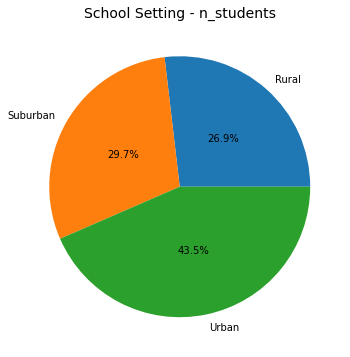

In [25]:
# Using matpllotlib
pie, ax = plt.subplots(figsize=[10, 6])
labels = scores_pie['school_setting']
plt.pie(x=scores_pie['n_student'], autopct="%.1f%%", labels=labels, pctdistance=0.5)

plt.title("School Setting - n_students", fontsize=14)
pie.savefig("Figure1.png", overwrite=True)

### HeatMap

In [37]:
# Remind the shape of preprocessed DataFrame: scores_groupby
scores_groupby

,school,school_setting,n_student,pretest,posttest
0,ANKYI,Urban,20.512195,61.341463,71.390244
1,CCAAW,Suburban,18.412844,64.623853,78.110092
2,CIMBB,Urban,18.648649,65.067568,76.945946
3,CUQAM,Urban,26.850467,53.925234,65.560748
4,DNQDD,Suburban,24.934426,54.327869,66.565574
5,FBUMG,Rural,15.565217,62.891304,78.608696
6,GJJHK,Suburban,23.932203,53.194915,65.025424
7,GOKXL,Rural,21.468750,50.796875,64.953125
8,GOOBU,Urban,26.569620,38.196203,49.613924
9,IDGFP,Urban,19.063830,75.202128,87.223404


In [35]:
# In order to configure HeatMap, we should make the DataFrame for Pivot Table
scores_pivot_n_students = scores_groupby.pivot('school', 'school_setting', 'n_student')
scores_pivot_n_students

school_setting,Rural,Suburban,Urban
school,,,
ANKYI,NaN,NaN,20.512195
CCAAW,NaN,18.412844,NaN
CIMBB,NaN,NaN,18.648649
CUQAM,NaN,NaN,26.850467
DNQDD,NaN,24.934426,NaN
FBUMG,15.565217,NaN,NaN
GJJHK,NaN,23.932203,NaN
GOKXL,21.468750,NaN,NaN
GOOBU,NaN,NaN,26.569620


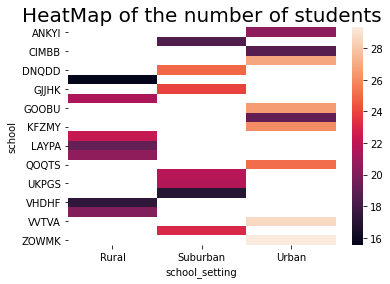

In [36]:
# Heatmap by seaborn

ax = sns.heatmap(scores_pivot_n_students)
plt.title('HeatMap of the number of students', fontsize=20)

plt.show()

In [38]:
scores_pivot_pretest = scores_groupby.pivot('school', 'school_setting', 'pretest')
scores_pivot_pretest

school_setting,Rural,Suburban,Urban
school,,,
ANKYI,NaN,NaN,61.341463
CCAAW,NaN,64.623853,NaN
CIMBB,NaN,NaN,65.067568
CUQAM,NaN,NaN,53.925234
DNQDD,NaN,54.327869,NaN
FBUMG,62.891304,NaN,NaN
GJJHK,NaN,53.194915,NaN
GOKXL,50.796875,NaN,NaN
GOOBU,NaN,NaN,38.196203


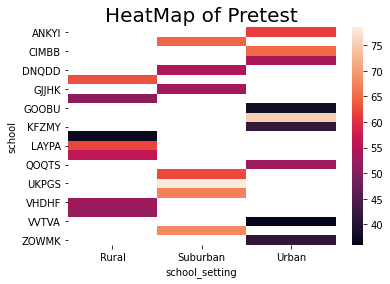

In [39]:
# Heatmap by seaborn

ax = sns.heatmap(scores_pivot_pretest)
plt.title('HeatMap of Pretest', fontsize=20)

plt.show()

In [ ]:
# school_setting과 school_type 비교